In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt #to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split  #to split training and testing data
import keras
from keras.utils import to_categorical  #to convert the labels present in y_train and t_test into one-hot encoding
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout  #to create CNN

data = []
labels = []
classes = 43
cur_path = "/kaggle/input/gtsrb-dataset/GTSRB/archive/"

In [8]:
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,"Train",str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + "/"+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
                              
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
                              
#Splitting training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
                              
#Converting the labels into one hot encoding
Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)
                              
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
                              
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
eps = 15
history = model.fit(X_train, Y_train, batch_size=32, epochs=eps, validation_data=(X_test, Y_test))
model.save("/kaggle/working/TrafficSignClassificationModel.keras")

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Epoch 1/15
981/981 [==============================] - 58s 57ms/step - loss: 2.9012 - accuracy: 0.2489 - val_loss: 0.8758 - val_accuracy: 0.7873
Epoch 2/15
981/981 [==============================] - 57s 58ms/step - loss: 0.7637 - accuracy: 0.7794 - val_loss: 0.2026 - val_accuracy: 0.9454
Epoch 3/15
981/981 [==============================] - 55s 56ms/step - loss: 0.4190 - accuracy: 0.8805 - val_loss: 0.1387 - val_accuracy: 0.9663
Epoch 4/15
981/981 [==============================] - 56s 57ms/step - loss: 0.3272 - accuracy: 0.9090 - val_loss: 0.0902 - val_accuracy: 0.9772
Epoch 5/15
981/981 [==============================] - 55s 57ms/step - loss: 0.2530 - accuracy: 0.9279 - val_loss: 0.1262 - val_accuracy: 0.9656
Epoch 6/15
981/981 [==============================] - 56s 57ms/step - loss: 0.2499 - accuracy: 0.9302 - val_loss: 0.0814 - val_accuracy: 0.9774
Epoch 7/15
981/981 [==============================] - 

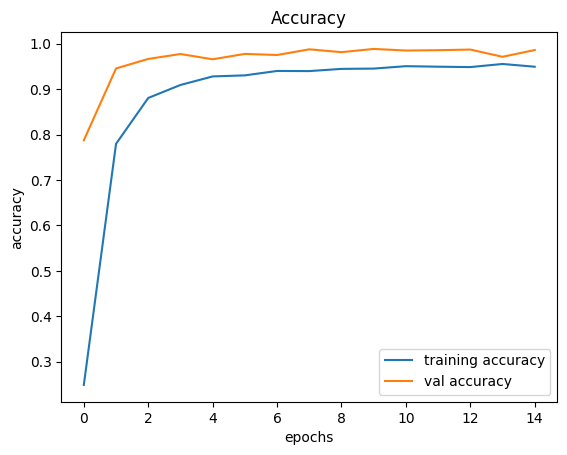

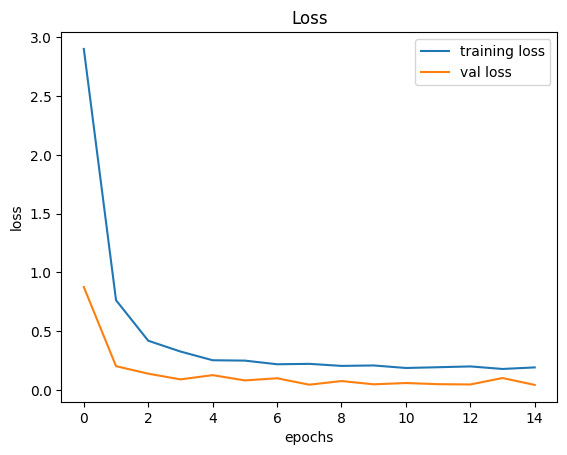

In [9]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons' }


In [11]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv(cur_path + 'Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open(cur_path + img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
                              
# Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x))

395/395 [==============================] - 6s 14ms/step
0.9558986539984164


1/1 [==============================] - 0s 23ms/step


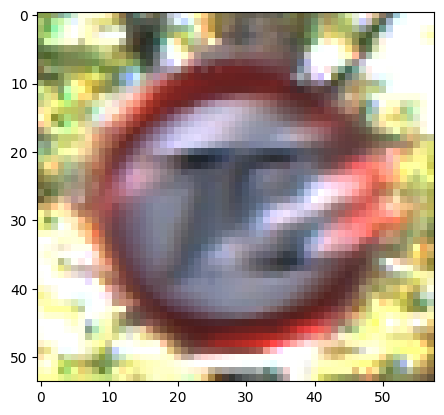

Prediction: End of speed limit (80km/h)
True Label: Speed limit (70km/h)
1/1 [==============================] - 0s 21ms/step


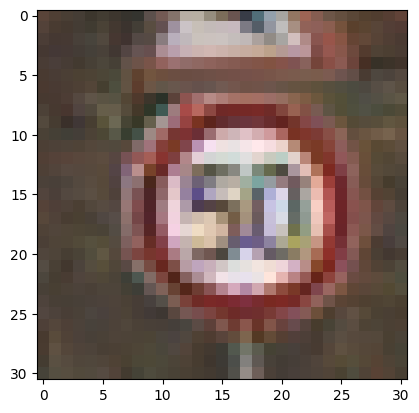

Prediction: Speed limit (50km/h)
True Label: Speed limit (50km/h)
1/1 [==============================] - 0s 22ms/step


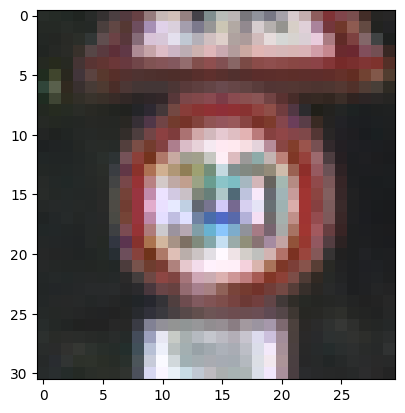

Prediction: Speed limit (30km/h)
True Label: Speed limit (30km/h)
1/1 [==============================] - 0s 21ms/step


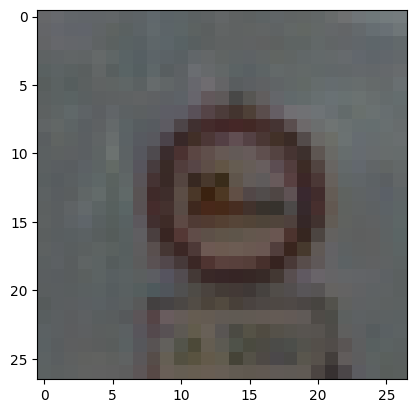

Prediction: No passing veh over 3.5 tons
True Label: No passing veh over 3.5 tons
1/1 [==============================] - 0s 22ms/step


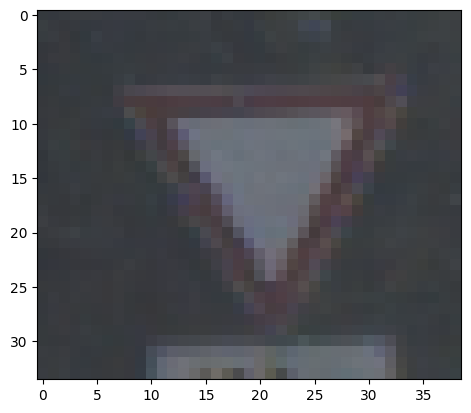

Prediction: Yield
True Label: Yield
1/1 [==============================] - 0s 22ms/step


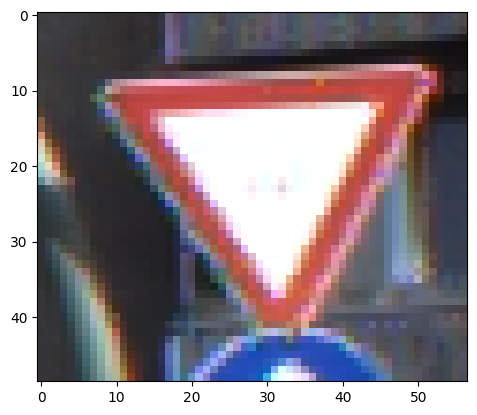

Prediction: Yield
True Label: Yield
1/1 [==============================] - 0s 23ms/step


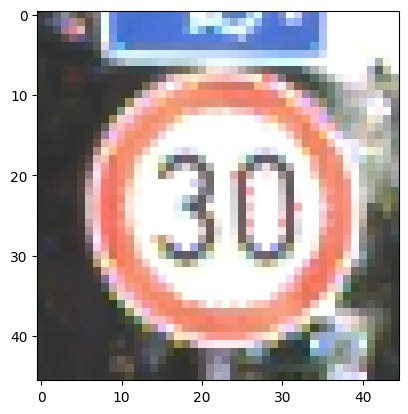

Prediction: Speed limit (30km/h)
True Label: Speed limit (30km/h)
1/1 [==============================] - 0s 22ms/step


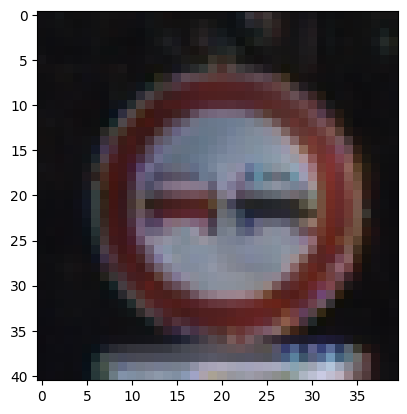

Prediction: No passing
True Label: No passing
1/1 [==============================] - 0s 32ms/step


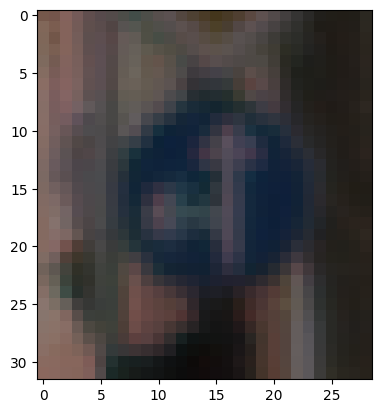

Prediction: Go straight or left
True Label: Go straight or left
1/1 [==============================] - 0s 24ms/step


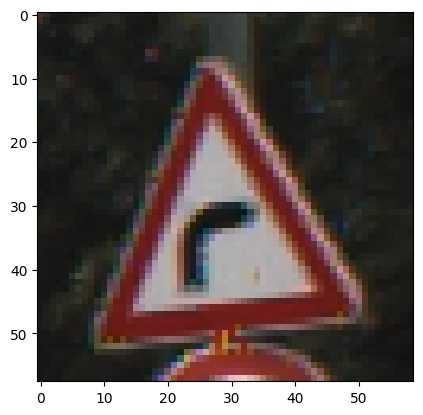

Prediction: Dangerous curve right
True Label: Dangerous curve right
1/1 [==============================] - 0s 22ms/step


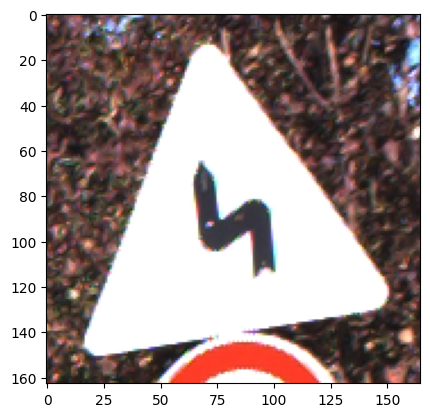

Prediction: Right-of-way at intersection
True Label: Double curve
1/1 [==============================] - 0s 25ms/step


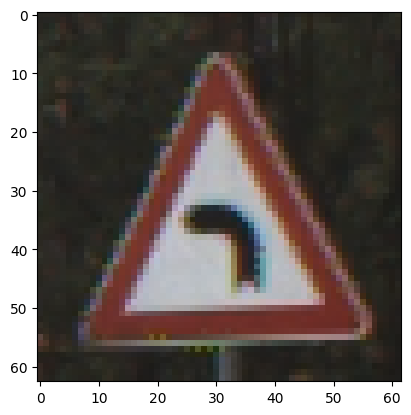

Prediction: Dangerous curve left
True Label: Dangerous curve left
1/1 [==============================] - 0s 23ms/step


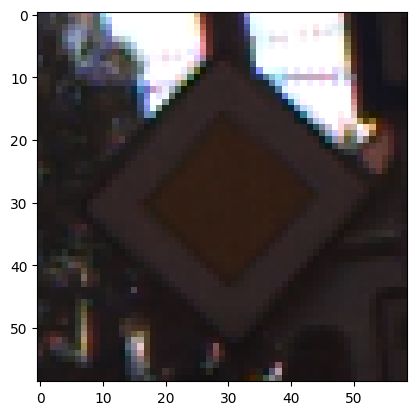

Prediction: Priority road
True Label: Priority road
1/1 [==============================] - 0s 23ms/step


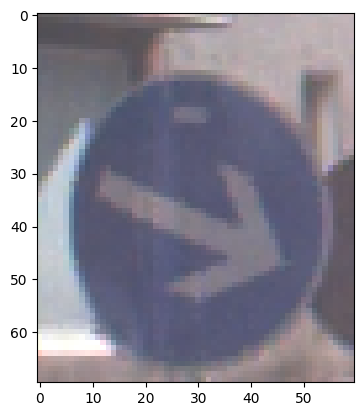

Prediction: Keep right
True Label: Keep right
1/1 [==============================] - 0s 22ms/step


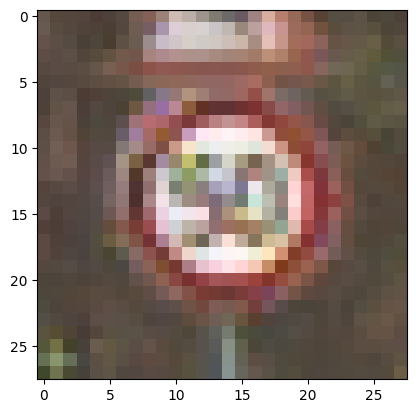

Prediction: Speed limit (50km/h)
True Label: Speed limit (50km/h)
1/1 [==============================] - 0s 24ms/step


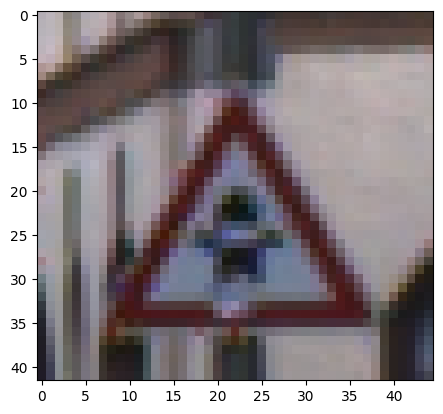

Prediction: Beware of ice/snow
True Label: Right-of-way at intersection
1/1 [==============================] - 0s 22ms/step


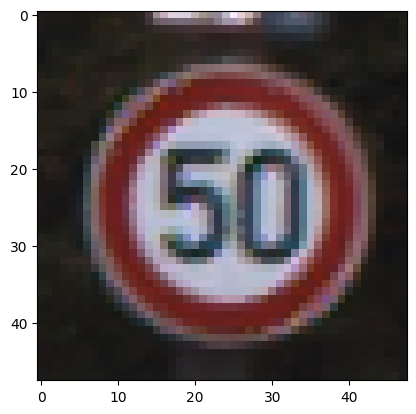

Prediction: Speed limit (50km/h)
True Label: Speed limit (50km/h)
1/1 [==============================] - 0s 24ms/step


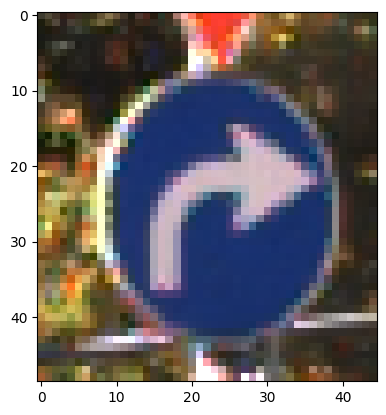

Prediction: Turn right ahead
True Label: Turn right ahead
1/1 [==============================] - 0s 23ms/step


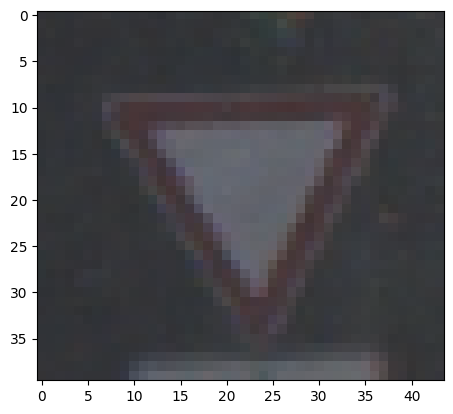

Prediction: Yield
True Label: Yield
1/1 [==============================] - 0s 23ms/step


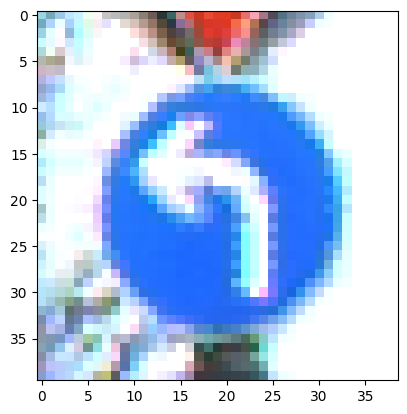

Prediction: Turn left ahead
True Label: Turn left ahead


In [12]:
#One-by-one testing to also visualise the test sample, the predicted and true labels!
from random import randint

y_test = pd.read_csv(cur_path + 'Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

a = randint(1, len(imgs) - 20)

for i in range(a, a + 20):
    data = []
    image = Image.open(cur_path + imgs[i])
    image = image.resize((30,30))
    data.append(np.array(image))
    
    X_test=np.array(data)
    predict_x = model.predict(np.expand_dims(X_test[0], axis=0))
    classes_x= np.argmax(predict_x,axis=1)
    
    plt.imshow(np.array(Image.open(cur_path + imgs[i])))
    plt.show()
    print("Prediction: " + classes[int(classes_x) + 1])
    print("True Label: " + classes[int(labels[i] + 1)])